In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
viridis = matplotlib.cm.get_cmap('viridis')

import sys
sys.path.append("../src/")
from evaluate_n_labeled import n_labeled_data

In [2]:
a = np.load("../data/latent/clf_latent/data_repr.npy")
tar = np.load("../data/latent/clf_latent/targets.npy")
#means = [b.mean(0).shape for b in a]
#stds = [b.std(0).shape for b in a]
#a = [(a[i] - means[i]) for i in range(len(a))]

In [3]:
[b.max() for b in a]

[66.96184539794922, 8230.38671875, 8.458669662475586]

In [ ]:
means, stds = n_labeled_data(a, tar, 100, [])

Evaluating dataset:  0


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Evaluating dataset:  1


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", C

In [1]:
print(means[2])

NameError: name 'means' is not defined

16 17
11 12
12 13


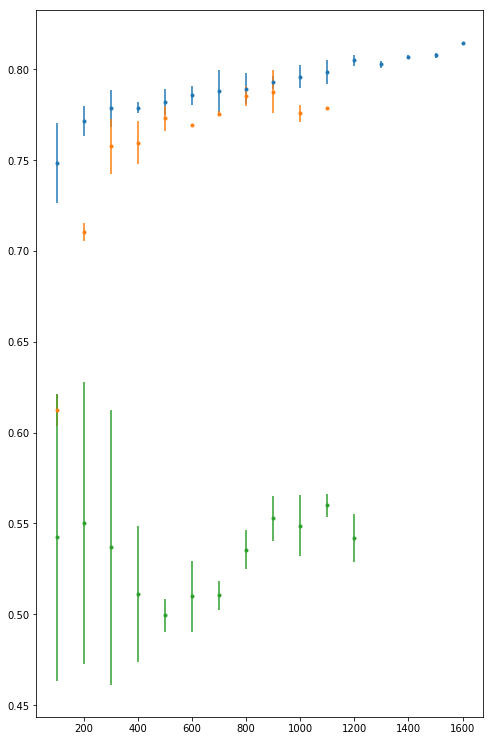

In [18]:
fig, ax = plt.subplots(figsize=(8, 13))

for i in range(len(a)):
    x = [100*i for i in range(1, means[i].shape[0])]
    print(len(x), len(means[i]))
    ax.errorbar(x, means[i][:-1], yerr=stds[i][:-1], fmt=".")

In [3]:
algo = "convae"
run =  "160"
arch = "static"
#data = "cleanevent"
size = "128"
datasets = ["simulated", "cleanevent", "realevent"]
runs = ["96", "160", "133"]
#datasets = ["realevent"]
#runs = ["188",]
#datasets =  ["realevent", "realevent"]
#runs = ["188", "175"]
#datasets = ["vgg_simulated", "vgg_cleanevent", "vgg_realevent"]
#runs = ["165", "159", "146"]
#datasets = ["vgg_cleanevent"]
#runs = ["158"]
losses_all = []
performance_all = []
params_all = []

to_print = [13, 84, 116]

for i in range(len(datasets)):
    data = datasets[i]
    run = runs[i]
    base_str = "../results/randomsearch_"+algo+"_"+data+"_"+size+"_clf/"
    
    if data != "simulated":
        param_vals = np.load(base_str+"run_"+run+"/hyperparam_vals_"+arch+".npy")
        losses = np.load(base_str+"run_"+run+"/loss_vals_"+arch+".npy")
        performance = np.load(base_str+"run_"+run+"/performance_"+arch+".npy")
    else:
        param_vals = np.load(base_str+"run_"+run+"hyperparam_vals_ours.npy")
        losses = np.load(base_str+"run_"+run+"loss_vals_ours.npy")
        performance = np.load(base_str+"run_"+run+"performance_ours.npy")

    #print(performance)
    n_highest = 20

    to_del = []
    for j, p in enumerate(performance):
        if len(p[0]) == 2:
            print(j)
            to_del.append(j)

    performance = np.array(np.delete(performance, to_del, axis=0))
    param_vals = np.array(np.delete(param_vals, to_del, axis=0))
    losses = np.array(np.delete(losses, to_del, axis=0))

    proton_test_f1 = np.array([p[0][0] for p in performance[:, 1]])
    proton_sort_ind = np.flip(np.argsort(proton_test_f1), 0)
    
    tot_test_f1 = np.array([p[0].mean() for p in performance[:,1]])
    tot_sort_ind = np.flip(np.argsort(tot_test_f1), 0)
    sorted_tot_test_f1 = tot_test_f1[tot_sort_ind]
    sorted_proton_test_f1 = proton_test_f1[proton_sort_ind]
    to_print[i]
    #print(param_vals[to_print[i]])
    #print(performance[to_print[i]])
    
    lx  = losses[:, 0]
    lx = np.where(lx > 0, lx, 1e5)
    best_lx = lx.min(1)
    ind_sort_lx = np.argsort(best_lx)
    #print(ind_sort_lx[0])
    #print(best_lx[ind_sort_lx[0]])
    #print(param_vals[ind_sort_lx[0]])
    print("##########")
    #print(losses.shape)
    p = 0
    print(sorted_tot_test_f1[0])
    print(tot_test_f1[tot_sort_ind[0]], param_vals[tot_sort_ind[0]])
    best_lx = losses[tot_sort_ind[p]][0]
    print("Max reconst loss: ", best_lx.max())
    print("Reconst loss :", param_vals[tot_sort_ind[p]][-2])
    print("test f1 ", tot_test_f1[tot_sort_ind[p]], performance[tot_sort_ind[p]][1][0])
    print("Ind of experiment: ", tot_sort_ind[p], "| run: ", run)
    print("N runs: ", len(proton_sort_ind))
    print("-----------")
    print(param_vals[tot_sort_ind[0]])

    losses = losses[tot_sort_ind][:n_highest]
    param_vals = param_vals[tot_sort_ind][:n_highest]
    performance = performance[tot_sort_ind][:n_highest]
    losses_all.append(losses)
    performance_all.append(performance)
    params_all.append(param_vals)
    
    #print(len(sorted_proton_test_f1))
    #print(sorted_proton_test_f1)
    #print(param_vals[p])
    #print("performance : ", performance[p])
    #print("test f1", performance[p][1][0].mean())
    #print("----------------------")

##########
0.9866666666666667
0.9866666666666667 [list([[2, 16, 64], [17, 15, 3], [2, 2, 2], [0, 0, 0], 3])
 list([0.01, 1e-05, 0.7267722581866471, 0.99, 150])
 {'batchnorm': False, 'include_MMD': False, 'include_KL': False, 'include_KM:': False, 'simulated_mode': False, 'restore_mode': False}
 {} 'mse' 'relu']
Max reconst loss:  0.001136922393925488
Reconst loss : mse
test f1  0.9866666666666667 [0.98666667 0.98666667]
Ind of experiment:  13 | run:  96
N runs:  43
-----------
[list([[2, 16, 64], [17, 15, 3], [2, 2, 2], [0, 0, 0], 3])
 list([0.01, 1e-05, 0.7267722581866471, 0.99, 150])
 {'batchnorm': False, 'include_MMD': False, 'include_KL': False, 'include_KM:': False, 'simulated_mode': False, 'restore_mode': False}
 {} 'mse' 'relu']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in greater


FileNotFoundError: [Errno 2] No such file or directory: '../results/randomsearch_convae_cleanevent_128_clf/run_160/hyperparam_vals_static.npy'

In [4]:
for i, params in enumerate(params_all):
    which = 0
    print(datasets[i])
    print("test f1: ", performance_all[i][which][1][0].mean())
    print(params[which])
    
    """
    for j, p in enumerate(params):
        if 3 == p[0][1][0]:
            f1 = performance_all[i][j][1][0].mean()
            arch = params_all[i][j]
            print("#############")
            print("test f1 : ", f1)
            print(arch)
            print("#############")
    print("--------------------------")
    """

realevent
test f1:  0.8145900844096133
[list([[8, 8, 32, 32], [5, 5, 3, 3], [2, 2, 2, 2], [0, 0, 0, 0], 4])
 list([0.001, 0.0001, 0.7488448785798214, 0.99, 200, 1.188888888888889])
 {'batchnorm': False, 'include_KL': False, 'include_MMD': True, 'restore_mode': False, 'include_KM:': False, 'simulated_mode': False, 'use_vgg': False, 'use_dd': True}
 {} 'mse' 'relu']
realevent
test f1:  0.80448033122487
[list([[8, 8, 16, 16], [5, 5, 3, 3], [2, 2, 2, 2], [0, 0, 0, 0], 4])
 list([0.01, 0.001, 0.7989680735022695, 0.99, 100, 3.366666666666667])
 {'batchnorm': True, 'include_KL': False, 'include_MMD': False, 'restore_mode': False, 'include_KM:': False, 'simulated_mode': False, 'use_vgg': False, 'use_dd': True}
 {} 'mse' 'lrelu']


In [5]:
performance_all[0][0][1][0].mean()

0.8356062231211628

In [ ]:
performance.shape

In [ ]:
classes = ["Simulated", "Filtered", "Full"]
loss = ["Reconstruction", "Latent"]

fig, axs = plt.subplots(ncols = len(data), nrows=2, figsize=(15, 20))
for i in range(len(loss)):
    for j in range(len(data)):
        ax = axs[i, j]
        ax_t = ax.twiny()
        performance = np.array([p[1][0].mean() for p in performance_all[j]])
        if i == 0:
            losses = np.zeros(losses_all[j].shape[0])
            for k, lc in enumerate(losses_all[j]):
                loss = lc[0]
                non_zero = np.nonzero(loss)[0]
                to_log = loss[non_zero[-1]]
                #print(to_log)
                losses[k] = to_log
            what_loss = losses > 1     
        else:
            losses = np.zeros(losses_all[j].shape[0])
            for k, lc in enumerate(losses_all[j]):
                loss = lc[1]
                non_zero = np.nonzero(loss)
                if len(non_zero[0]) == 0:
                    continue
                else:
                    to_log = loss[non_zero[0][-1]]
                    #print(to_log)
                    losses[k] = to_log
            what_loss = np.zeros(len(losses))
            for k, param in enumerate(params_all[j]):
                loss = param[2]["include_MMD"]
                what_loss[k] = 1 if loss else 0 
            
            what_loss = what_loss.astype(bool)
            
        outlier_filter = losses < 1e4
        one_plot = [losses[np.logical_and(what_loss, outlier_filter)], performance[np.logical_and(what_loss, outlier_filter)]]
        two_plot = [losses[np.logical_and(~what_loss, outlier_filter)], performance[np.logical_and(~what_loss, outlier_filter)]]

        #print(losses.shape, performance.shape)
        ax.scatter(one_plot[0], one_plot[1])
        ax_t.scatter(two_plot[0], two_plot[1])

In [ ]:
def binary_crossent(x, y=1): return -(y*np.log(x) + (1-y)*np.log(1-x))
def mse(x, y=1): return np.power(x-y, 2)

x = np.linspace(-3, 3, 300)
y = [0.7, ] #np.linspace(1e-3, 1, 5)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
for y_ in y:
    ax[0].plot(x, binary_crossent(x, y_), linewidth=3, color=viridis(0.4))
    ax[0].plot([y_,]*2,[0.5, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[0].set_xlabel("x", size=20)
    ax[0].set_ylabel("Binary crossentropy", size=20)
    ax[0].legend(fontsize=15)
    
    ax[1].plot(x, mse(x, y_), linewidth=3, color=viridis(0.4))
    ax[1].plot([y_,]*2,[-0.4, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[1].set_xlabel("x", size=20)
    ax[1].set_ylabel("Squared error", size=20)
    ax[1].legend(fontsize=15)
    
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

In [ ]:
print(performance.shape)
print("experiments, train/test, scores, classes")
print(performance[0])

In [ ]:
losses.shape

In [ ]:
a = [print(h[-1], h[0]) for h in param_vals]

In [ ]:
loss_names = [r"$L_x$", r"$L_z/\beta$"]
n_plot = 10
fig, ax = plt.subplots(ncols=losses.shape[1], figsize=(16, 9))
colors = viridis(np.linspace(0.3, max(sorted_proton_test_f1), n_plot))
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

#fig.suptitle("Loss curves from simulated parameter search", size=35)

label_size = 30
ax[1].set_ylabel(r"Maximum mean discrepancy: $\bigtriangledown$", size=label_size)
ax3.set_ylabel(r"Kullback-Leibler : $\bullet$", size=label_size)

ax2.set_ylabel(r"Mean squared error: $\bigtriangleup$", size=label_size)
ax[0].set_ylabel(r"Binary crossentropy: $\diamond$", size=label_size)

ax[0].set_title(r"Reconstruction loss: "+loss_names[0], size=30)
ax[1].set_title("Latent loss: "+loss_names[1], size=30)

for j in range(n_plot):
    if j == 5:
        continue
    if j == 8:
        continue
    for i, a in enumerate(ax):
        if i == 1:
            beta = param_vals[j][1][0]
            mode = param_vals[j][2]
            which = None
            for l, v in mode.items():
                if v:
                    if l != "batchnorm":
                        which = l
            if which == "include_KL":
                fmt = "o-"
                a = ax3
            elif which == "include_MMD":
                fmt = "v-"
                a = ax[1]
            else:
                fmt = "-"
        else:
            beta = 1
            if np.any(losses[j, i, :][50:]>1e1):
                fmt = "^-"
            else:
                fmt = "D-"
                a = ax2
        loss = losses[j, i, 2:]/beta
        a.semilogy(
            np.arange(loss.shape[0]),
            loss,
            fmt,
            markevery=250,
            color=colors[j],
            markersize=15,
            linewidth=0.5,
            alpha=0.6
        )
        print(sorted_proton_test_f1[j])
        a.tick_params(axis='both', which='major', labelsize=15)
        a.set_xlabel("epoch", size=20)

#ax[0].set_yscale("linear")
ax[0].set_yticks([1e4, 1e3, 1e2])
plt.tight_layout()
plt.savefig("../plots/simulated_clf/randomsearch_loss"+algo+".png")
plt.savefig("../plots/simulated_clf/randomsearch_loss"+algo+".pdf")

In [7]:
import pandas as pd

columns = [
    "F1 score",
    r"$L_x$",
    r"$L_z$",
    "N parameters",
    "largest kernel",
    "N layers",
    "latent dimension",
    "latent loss",
    "reconstruction loss",
    "activation function",
    "batchnorm",
    r"$\beta$",
    r"$\beta_1$",
    r"$\eta$",

]

categorical_cols = [
    "latent loss",
    "reconstruction loss",
    "activation function",
]

dataframes = []
for j, d in enumerate(datasets):
    param_performance = np.zeros((performance.shape[0], len(columns))).astype(object)
    performance = performance_all[j]
    param_vals = params_all[j]
    losses = losses_all[j]
    for i in range(performance.shape[0]):
        config = param_vals[i]
        #print(performance.shape)
        p_f1 = performance[i][1].mean() #sorted_proton_test_f1[i]
        n_params = 0
        for f, k in zip(config[0][0], config[0][1]):
            n_params += k**2*f
        n_layers = config[0][4]
        end_size = 80/(2**n_layers)
        beta1 = config[1][2]
        beta = config[1][1]
        latent_dim = config[1][4]
        eta=config[1][1]
        mode_config = config[2]
        batchnorm = mode_config["batchnorm"]
        
        lx  = losses[i, 0]
        lx = np.where(lx > 0, lx, 1e5)
        best_lx = lx.min()
        
        lz  = losses[i, 1]
        lz = np.where(lz > 0, lz, 1e5)
        best_lz = lz.min()

        latent_loss = "mmd" if mode_config["include_MMD"] else "kld"
        if latent_loss == "kld":
            latent_loss = latent_loss if mode_config["include_KL"] else "none"

        reconst_loss = config[4]
        if reconst_loss is None:
            reconst_loss = "bce"

        activation = config[5] 
        param_performance[i] = [
            p_f1,
            best_lx,
            best_lz,
            n_params,
            config[0][1][0],
            n_layers,
            latent_dim,
            latent_loss,
            reconst_loss,
            activation,
            batchnorm,
            beta,
            beta1,
            eta,
        ]

    perf_df = pd.DataFrame(param_performance, columns=columns)
    dataframes.append(perf_df)

In [ ]:
test_df = perf_df.copy()
for c in categorical_cols:
    dummy = pd.get_dummies(test_df[c])
    test_df = pd.concat([test_df, dummy], axis=1)
    test_df = test_df.drop(c, axis=1)

In [ ]:
test_df

In [ ]:
import seaborn as sns

test_df = test_df.dropna()
sns.pairplot(test_df, diag_kind="hist",)

In [ ]:
import statsmodels.api as sm

test_df = test_df.dropna()
test_df["const"] = 1
data_cols = [c  for c in test_df.columns if c != "f1_score"]
#data = test_df[data_cols]
#print(test_df.f1_score.values.shape)
ols_model = sm.OLS(endog=test_df.f1_score.values.astype(float), exog=test_df[data_cols].values.astype(float))
result = ols_model.fit()
print(result.summary())

In [ ]:
from scipy.stats import spearmanr
test_df = test_df.astype(float)
corr_array = np.zeros((len(test_df.columns), 2))
for i, c in enumerate(test_df.columns):
    w, p = spearmanr(test_df[c], test_df["proton f1 score"])
    corr_array[i] = [w, p]

corr_m = pd.DataFrame(corr_array, columns=[r"$\rho_s$", "p"], index=test_df.columns)

In [ ]:
corr_m

In [ ]:
print(corr_m.to_latex(float_format=lambda x: "{:.2g}".format(x),  escape=False),)

In [ ]:
param_vals[3]

In [8]:
dataframes[0]

,F1 score,$L_x$,$L_z$,N parameters,largest kernel,N layers,latent dimension,latent loss,reconstruction loss,activation function,batchnorm,$\beta$,$\beta_1$,$\eta$
0,0.815723,0.00423965,0.00336515,976,5,4,200,mmd,mse,relu,False,0.0001,0.748845,0.0001
1,0.80052,0.00412994,100000,976,5,4,100,none,mse,lrelu,True,0.0001,0.931548,0.0001
2,0.793912,0.00432783,100000,688,5,4,100,none,mse,lrelu,True,0.001,0.77156,0.001
3,0.797672,0.00417409,0.00729864,2176,5,4,50,mmd,mse,lrelu,True,0.001,0.441553,0.001
4,0.788598,0.0045926,100000,688,5,4,200,none,mse,lrelu,False,0.0001,0.255875,0.0001
5,0.780091,0.00512153,100000,1088,5,4,150,none,mse,lrelu,False,1e-05,0.748502,1e-05
6,0.78553,0.00570947,0.0241054,1376,5,4,50,mmd,mse,relu,False,0.0001,0.647847,0.0001
7,0.774756,0.0057179,0.0207915,1088,5,4,10,mmd,mse,lrelu,False,0.001,0.374445,0.001
8,0.770226,0.00513076,100000,1088,5,4,150,none,mse,lrelu,True,1e-05,0.768986,1e-05
9,0.763657,0.00531745,0.0141592,2176,5,4,20,mmd,mse,lrelu,True,0.001,0.525585,0.001


In [34]:
print(dataframes[0].to_latex(
    #"../tables/randomsearch_convae_simulated_clf/hyperparams.tex",
    index=False,
    longtable=False,
    float_format=lambda x: r"$\num{{ {:.2g} }}$".format(x),
    escape=False,
))

\begin{tabular}{llllllllllllll}
\toprule
      F1 score &             $L_x$ &             $L_z$ & N parameters & largest kernel & N layers & latent dimension & latent loss & reconstruction loss & activation function & batchnorm &          $\beta$ &      $\beta_1$ &           $\eta$ \\
\midrule
$\num{ 0.99 }$ & $\num{ 0.00032 }$ &   $\num{ 1e+05 }$ &         4754 &             17 &        3 &              150 &        none &                 mse &                relu &     False &  $\num{ 1e-05 }$ & $\num{ 0.73 }$ &  $\num{ 1e-05 }$ \\
$\num{ 0.99 }$ & $\num{ 1.1e+03 }$ &      $\num{ 34 }$ &         3798 &             13 &        6 &               50 &         mmd &                 bce &               lrelu &     False &  $\num{ 0.001 }$ & $\num{ 0.82 }$ &  $\num{ 0.001 }$ \\
$\num{ 0.98 }$ & $\num{ 0.00063 }$ & $\num{ 0.00028 }$ &         3636 &             15 &        5 &              150 &         mmd &                 mse &               lrelu &     False &  $\num{ 1e-05 }$ & $\num{ 

In [ ]:
with open("../metrics_clf/simulated/f1_scores2000.tex") as fo:
    s = "".join(fo.readlines())
print(s)